In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame({'age': [10, 25, 30, 5, 50, 60],
                  'salary': [5000, 20000, 50000, 1000, 100000, 1500000],
                  'strength': [100, 80, 70, 100, 40, 20]})

In [130]:
df.corr()

,age,salary,strength
age,1.000000,0.720238,-0.993299
salary,0.720238,1.000000,-0.768420
strength,-0.993299,-0.768420,1.000000


In [131]:
import seaborn as sns
df = pd.read_csv('dirtydata.csv')

In [132]:
df.isnull().sum()

Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64

In [133]:
df.iloc[22,1] = '2020-12-22'

In [134]:
print(df[df['Calories'].isnull()])

    Duration          Date  Pulse  Maxpulse  Calories
18        45  '2020/12/18'     90       112       NaN
28        60  '2020/12/28'    103       132       NaN


In [135]:
df.loc[18,'Calories']  = df[df['Duration'] == 45]['Calories'].mean().astype(int)

In [136]:
df.loc[28,'Calories']  = df[df['Duration'] == 60]['Calories'].mean().astype(int)

In [137]:
df.isnull().sum()

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

In [138]:
# Successfully handles missing values

In [139]:
# Now handling Wrong Formatted values

In [140]:
df.info() # in the result the datatype of date is object which is not a correct datatype so make it datetime 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      32 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  32 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [141]:
df['Date'] = pd.to_datetime(df['Date'],format='mixed')

In [142]:
df.info() #succesfully converted date column tp datetime datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Duration  32 non-null     int64         
 1   Date      32 non-null     datetime64[ns]
 2   Pulse     32 non-null     int64         
 3   Maxpulse  32 non-null     int64         
 4   Calories  32 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 1.4 KB


<Axes: ylabel='Calories'>

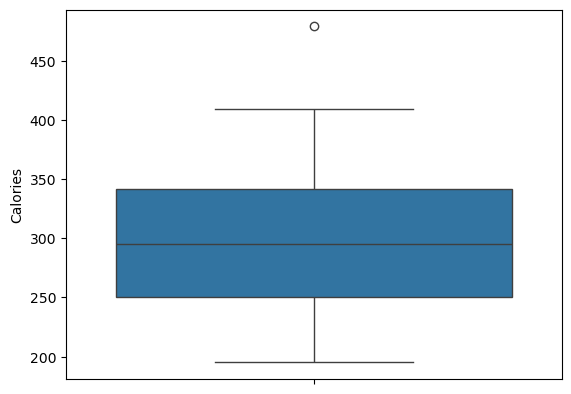

In [143]:
sns.boxplot(df['Calories'])

In [144]:
df[df['Calories'] >  450] # It makes sense that it is not a outlier... its natural 

,Duration,Date,Pulse,Maxpulse,Calories
1,60,2020-12-02,117,145,479.0


<Axes: ylabel='Duration'>

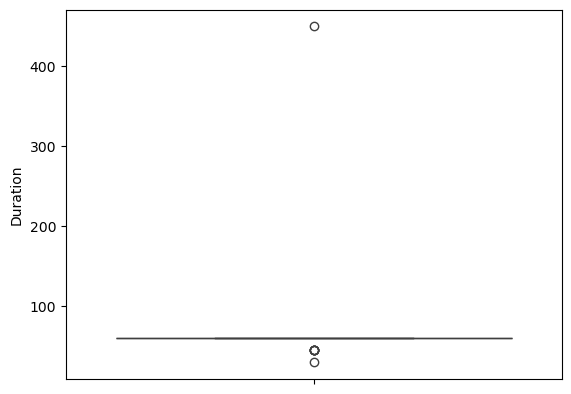

In [145]:
sns.boxplot(df['Duration'])

In [146]:
df[df['Duration'] > 400]

,Duration,Date,Pulse,Maxpulse,Calories
7,450,2020-12-08,104,134,253.3


In [147]:
df.loc[7, 'Duration'] = 45  # 450 is an outlier but seems to be it is wrongly entered instead of 45

In [148]:
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,45,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


In [149]:
# Final step is to remove duplicates

In [150]:
df[df.duplicated()]

,Duration,Date,Pulse,Maxpulse,Calories
12,60,2020-12-12,100,120,250.7


In [151]:
df.loc[10:15]

,Duration,Date,Pulse,Maxpulse,Calories
10,60,2020-12-11,103,147,329.3
11,60,2020-12-12,100,120,250.7
12,60,2020-12-12,100,120,250.7
13,60,2020-12-13,106,128,345.3
14,60,2020-12-14,104,132,379.3
15,60,2020-12-15,98,123,275.0


In [152]:
df = df.drop_duplicates()

In [153]:
df

,Duration,Date,Pulse,Maxpulse,Calories
0,60,2020-12-01,110,130,409.1
1,60,2020-12-02,117,145,479.0
2,60,2020-12-03,103,135,340.0
3,45,2020-12-04,109,175,282.4
4,45,2020-12-05,117,148,406.0
5,60,2020-12-06,102,127,300.0
6,60,2020-12-07,110,136,374.0
7,45,2020-12-08,104,134,253.3
8,30,2020-12-09,109,133,195.1
9,60,2020-12-10,98,124,269.0


In [154]:
df.duplicated().sum()

np.int64(0)

In [155]:
cor = df[['Duration','Pulse','Maxpulse','Calories']].corr()
cor

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.059452,-0.250033,0.356131
Pulse,-0.059452,1.000000,0.269672,0.493039
Maxpulse,-0.250033,0.269672,1.000000,0.345273
Calories,0.356131,0.493039,0.345273,1.000000


<Axes: >

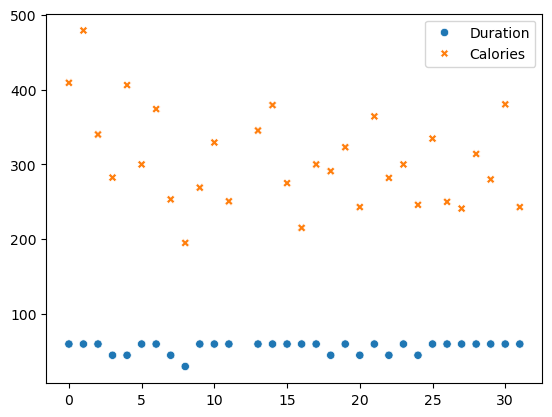

In [160]:
sns.scatterplot(df[['Duration','Calories']])

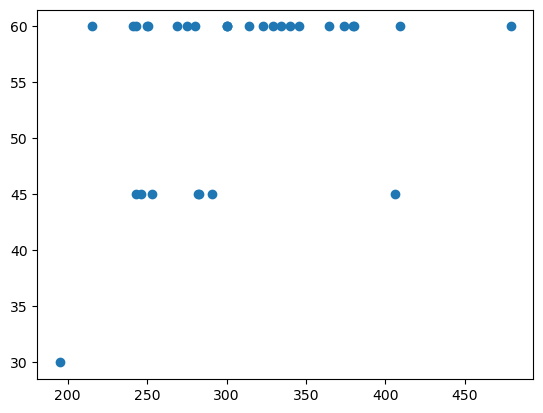

In [161]:
plt.scatter(df['Calories'],df['Duration'])


In [166]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

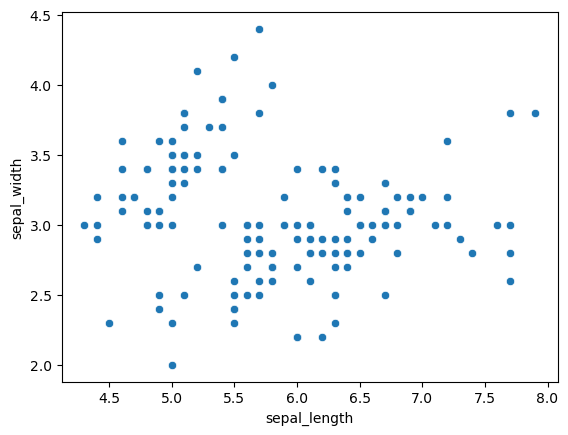

In [182]:
sns.scatterplot(x = 'sepal_length',y = 'sepal_width', data=df)

<Axes: xlabel='petal_length', ylabel='petal_width'>

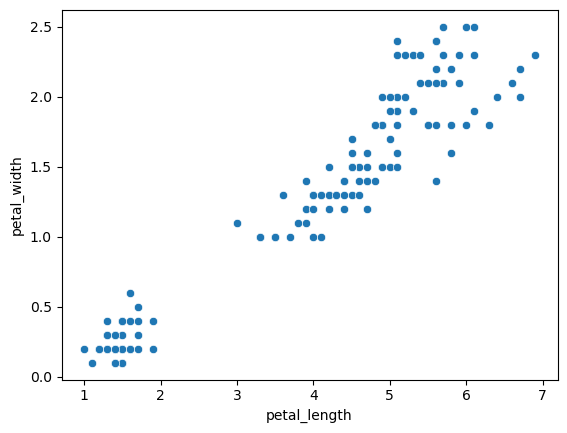

In [181]:
sns.scatterplot(x = 'petal_length', y ='petal_width', data=df)

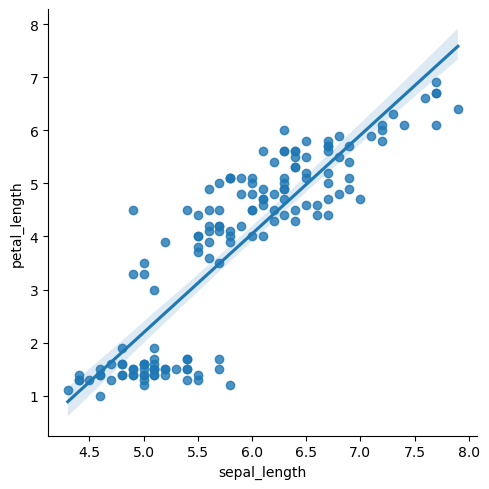

In [180]:
sns.lmplot(x = 'sepal_length', y = 'petal_length', data=df)

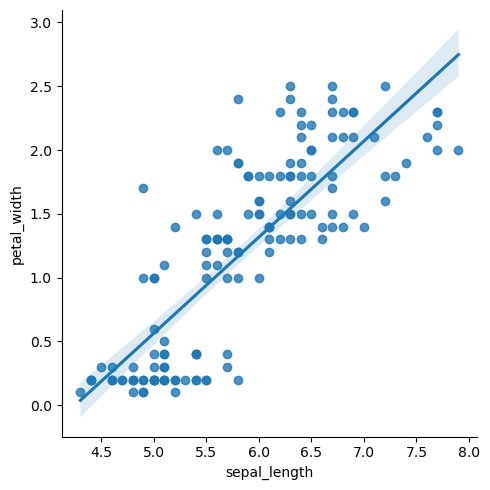

In [179]:
sns.lmplot(x = 'sepal_length', y = 'petal_width', data=df)

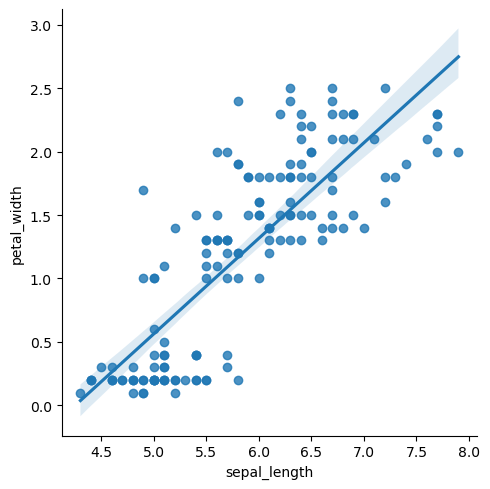

In [174]:
sns.lmplot(x='sepal_length', y='petal_width', data=df)
